In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# this requires Astropy 1.2.1
from astropy.stats import LombScargle
#import astropy
#print astropy.__version__

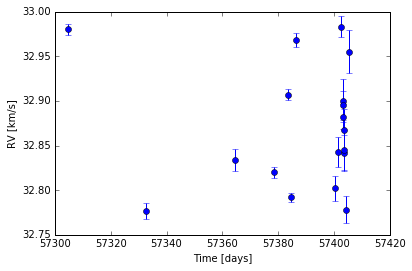

In [3]:
# Read the RV measurements
filename = '../EPIC-9792_SOPHIE.rdb'
time, rv, rv_error = np.loadtxt(filename, 
                                unpack=True, skiprows=2)

# plot the data
plt.figure()
plt.errorbar(time, rv, rv_error, fmt='o')
plt.xlabel('Time [days]')
plt.ylabel('RV [km/s]')

In [4]:
# using Astropy's Lomb-Scargle periodogram is very easy!
frequency, power = LombScargle(time, rv, rv_error).autopower()
period = 1 / frequency

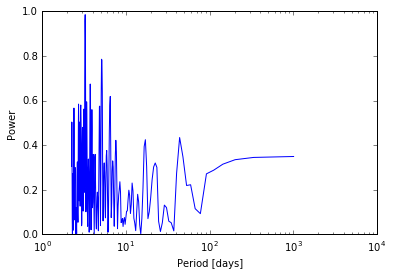

In [5]:
# plot the periodogram
fig = plt.figure()
plt.semilogx(period, power)
plt.xlabel('Period [days]')
plt.ylabel('Power')

In [6]:
# determine the period of maximum power
best_period = period[power.argmax()]
print best_period

3.2631815534


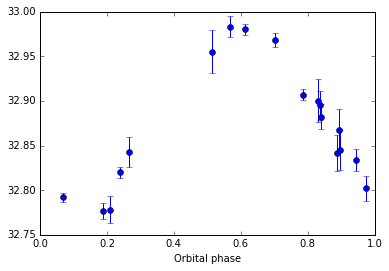

In [7]:
# plot the RVs phase-folded to the best period
# use epoch0 from BLS
T0 = 57064.424499156354
phase = ((time - T0) / best_period) % 1

plt.figure()
plt.errorbar(phase, rv, rv_error, fmt='o')
plt.xlim([0, 1])
plt.xlabel('Orbital phase')
plt.show()